In [44]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [45]:
data = pd.read_csv("C:/Users/M A I M U N A/Downloads/29. sales_data_final.csv")


In [46]:
df=data.copy()

In [47]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,1/1/2011,1/6/2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,1/1/2011,1/5/2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,1/1/2011,1/5/2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,1/1/2011,1/8/2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [18]:
df.columns

Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_month', 'order_year'],
      dtype='object')

In [19]:
df.dtypes

order_id                  object
order_date        datetime64[ns]
ship_date         datetime64[ns]
ship_mode                 object
customer_name             object
segment                   object
state                     object
country                   object
market                    object
region                    object
product_id                object
category                  object
sub_category              object
product_name              object
sales                    float64
quantity                   int64
discount                 float64
profit                   float64
shipping_cost            float64
order_priority            object
year                       int64
order_month                int32
order_year                 int32
dtype: object

In [7]:
df.info

<bound method DataFrame.info of               order_id  order_date ship_date       ship_mode  \
0         AG-2011-2040    1/1/2011  1/6/2011  Standard Class   
1        IN-2011-47883    1/1/2011  1/8/2011  Standard Class   
2         HU-2011-1220    1/1/2011  1/5/2011    Second Class   
3      IT-2011-3647632    1/1/2011  1/5/2011    Second Class   
4        IN-2011-47883    1/1/2011  1/8/2011  Standard Class   
...                ...         ...       ...             ...   
51285   CA-2014-115427  12/31/2014  1/4/2015  Standard Class   
51286     MO-2014-2560  12/31/2014  1/5/2015  Standard Class   
51287   MX-2014-110527  12/31/2014  1/2/2015    Second Class   
51288   MX-2014-114783  12/31/2014  1/6/2015  Standard Class   
51289   CA-2014-156720  12/31/2014  1/4/2015  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

## Data pre processing

In [48]:
df['order_date']=pd.to_datetime(df['order_date'])
df['ship_date']=pd.to_datetime(df['ship_date'])

In [49]:
df[['order_date','ship_date']].dtypes

order_date    datetime64[ns]
ship_date     datetime64[ns]
dtype: object

In [7]:
df['sales'].head

<bound method NDFrame.head of 0        408
1        120
2         66
3         45
4        114
        ... 
51285     14
51286      4
51287     26
51288      7
51289      3
Name: sales, Length: 51290, dtype: object>

## data cleaning

In [50]:
df['sales']=pd.to_numeric(df['sales'],errors='coerce')

In [51]:
df.isna().sum()

order_id             0
order_date           0
ship_date            0
ship_mode            0
customer_name        0
segment              0
state                0
country              0
market               0
region               0
product_id           0
category             0
sub_category         0
product_name         0
sales             2630
quantity             0
discount             0
profit               0
shipping_cost        0
order_priority       0
year                 0
dtype: int64

In [52]:
df=df.dropna(subset=['sales'])

In [61]:
cols_to_strip = [
    'customer_name', 'product_name', 'category', 'sub_category',
    'ship_mode', 'segment', 'state', 'country',
    'market', 'region', 'order_priority'
]

df[cols_to_strip] = df[cols_to_strip].apply(lambda x: x.str.strip())

In [11]:
df.info

<bound method DataFrame.info of               order_id order_date  ship_date       ship_mode  \
0         AG-2011-2040 2011-01-01 2011-01-06  Standard Class   
1        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
2         HU-2011-1220 2011-01-01 2011-01-05    Second Class   
3      IT-2011-3647632 2011-01-01 2011-01-05    Second Class   
4        IN-2011-47883 2011-01-01 2011-01-08  Standard Class   
...                ...        ...        ...             ...   
51285   CA-2014-115427 2014-12-31 2015-01-04  Standard Class   
51286     MO-2014-2560 2014-12-31 2015-01-05  Standard Class   
51287   MX-2014-110527 2014-12-31 2015-01-02    Second Class   
51288   MX-2014-114783 2014-12-31 2015-01-06  Standard Class   
51289   CA-2014-156720 2014-12-31 2015-01-04  Standard Class   

          customer_name      segment             state        country  market  \
0       Toby Braunhardt     Consumer       Constantine        Algeria  Africa   
1           Joseph Holt     Consumer 

In [14]:
df.shape

(48660, 21)

In [62]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,48660,48660,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000,48660.000000
mean,2013-05-11 23:01:03.033292032,2013-05-15 22:20:57.114673408,161.017838,3.350658,0.145722,14.688249,17.593780,2012.777579
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.000000,1.000000,0.000000,-1924.542000,0.000000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,29.000000,2.000000,0.000000,0.000000,2.450000,2012.000000
50%,2013-07-09 00:00:00,2013-07-13 00:00:00,77.000000,3.000000,0.000000,8.460000,7.030000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,208.000000,4.000000,0.200000,31.154400,20.152500,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,999.000000,14.000000,0.850000,486.600000,427.100000,2014.000000
std,NaN,NaN,201.092519,2.198216,0.215066,86.825672,28.559365,1.098732


In [63]:
df['region'].value_counts()

region
Central           10543
South              6340
EMEA               4891
North              4520
Africa             4448
Oceania            3238
West               3043
Southeast Asia     2926
East               2705
North Asia         2121
Central Asia       1867
Caribbean          1643
Canada              375
Name: count, dtype: int64

## feature engineering

In [55]:
df["order_month"]=df["order_date"].dt.month
df.rename(columns={'year': 'order_year'}, inplace=True)

In [21]:
df.columns


Index(['order_id', 'order_date', 'ship_date', 'ship_mode', 'customer_name',
       'segment', 'state', 'country', 'market', 'region', 'product_id',
       'category', 'sub_category', 'product_name', 'sales', 'quantity',
       'discount', 'profit', 'shipping_cost', 'order_priority', 'year',
       'order_month', 'order_year'],
      dtype='object')

In [58]:
year_sales=df.groupby('order_year')['sales'].sum()

In [59]:
year_sales

order_year
2011    1378151.0
2012    1681499.0
2013    2107021.0
2014    2668457.0
Name: sales, dtype: float64

## EDA

In [64]:
df["sales"].describe

<bound method NDFrame.describe of 0        408.0
1        120.0
2         66.0
3         45.0
4        114.0
         ...  
51285     14.0
51286      4.0
51287     26.0
51288      7.0
51289      3.0
Name: sales, Length: 48660, dtype: float64>

In [65]:
df['sales'].isna().sum()


np.int64(0)

<Axes: title={'center': 'Year-wise Sales'}, xlabel='order_year'>

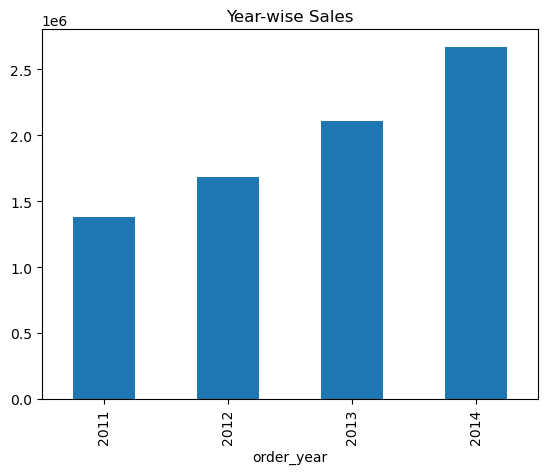

In [67]:
year_sales.plot(kind='bar', title='Year-wise Sales')


In [69]:
monthly_sales = df.groupby('order_month')['sales'].sum()
monthly_sales


order_month
1     385781.0
2     339990.0
3     466475.0
4     455594.0
5     562178.0
6     807184.0
7     488345.0
8     784982.0
9     893366.0
10    705696.0
11    988420.0
12    957117.0
Name: sales, dtype: float64

In [71]:
df.groupby('category')['sales'].sum().sort_values(ascending=False)


category
Office Supplies    2790258.0
Technology         2638265.0
Furniture          2406605.0
Name: sales, dtype: float64